<a href="https://colab.research.google.com/github/loizidisvasileios-code/Credit-scoring-ML/blob/main/CreditRiskThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diploma thesis
_Credit Scoring using Machine Learning Models and SHAP explainability – Loizidis Vasileios_  
_Department of Applied Mathematics and Physical Sciences, National Technical University of Athens_  
_Supervisor: Petros Stefaneas_  
_Date: November 2025_

---

###  Overview

This notebook presents the implementation of Machine Learning Models applied to a credit scoring dataset.  
The goal is to predict the probability of default (binary outcome: default / no default) based on customer financial and demographic features.

The workflow includes:
- Data loading and initial inspection  
- Exploratory Data Analysis (EDA)  
- Preprocessing (missing values, scaling)  
- Models training and evaluation (Logistic Regression, SVM, Random Forest, XGBoost, Neural Networks)  
- Performance comparison and visualization  
- SHAP explainability

---


---

### Tools and Libraries
- Python (Google Colab)  
- pandas, numpy, matplotlib, seaborn  
- scikit-learn  



***Data Loading and Overview***

In this section I connect Google Drive to Colab, load the dataset (cs-training.csv) and inspect dataset shape, column types and missing values





In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from google.colab import files
uploaded = files.upload()


Saving cs-training.csv to cs-training.csv


In [2]:
import pandas as pd
df= pd.read_csv("cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
import pandas as pd
df = pd.read_csv("cs-training.csv", encoding="latin1")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
df=df.drop(columns=["Unnamed: 0"], errors="ignore")

In [4]:
table = pd.DataFrame({
    "Τύπος δεδομένων": df.dtypes,
    "Πλήθος μη κενών": df.count(),
    "Πλήθος ελλειπόντων": df.isna().sum(),
    "Πλήθος διακεκριμένων": df.nunique(),
    "Ελάχιστη τιμή": df.min(numeric_only=True),
    "Μέγιστη τιμή": df.max(numeric_only=True)
})
table


,Τύπος δεδομένων,Πλήθος μη κενών,Πλήθος ελλειπόντων,Πλήθος διακεκριμένων,Ελάχιστη τιμή,Μέγιστη τιμή
Unnamed: 0,int64,150000,0,150000,1.0,150000.0
SeriousDlqin2yrs,int64,150000,0,2,0.0,1.0
RevolvingUtilizationOfUnsecuredLines,float64,150000,0,125728,0.0,50708.0
age,int64,150000,0,86,0.0,109.0
NumberOfTime30-59DaysPastDueNotWorse,int64,150000,0,16,0.0,98.0
DebtRatio,float64,150000,0,114194,0.0,329664.0
MonthlyIncome,float64,120269,29731,13594,0.0,3008750.0
NumberOfOpenCreditLinesAndLoans,int64,150000,0,58,0.0,58.0
NumberOfTimes90DaysLate,int64,150000,0,19,0.0,98.0
NumberRealEstateLoansOrLines,int64,150000,0,28,0.0,54.0


In [ ]:
latex_code=table.to_latex(index=True)
print(latex_code)


\begin{tabular}{llrrrrr}
\toprule
 & Τύπος δεδομένων & Πλήθος μη κενών & Πλήθος ελλειπόντων & Πλήθος διακεκριμένων & Ελάχιστη τιμή & Μέγιστη τιμή \\
\midrule
Unnamed: 0 & int64 & 150000 & 0 & 150000 & 1.000000 & 150000.000000 \\
SeriousDlqin2yrs & int64 & 150000 & 0 & 2 & 0.000000 & 1.000000 \\
RevolvingUtilizationOfUnsecuredLines & float64 & 150000 & 0 & 125728 & 0.000000 & 50708.000000 \\
age & int64 & 150000 & 0 & 86 & 0.000000 & 109.000000 \\
NumberOfTime30-59DaysPastDueNotWorse & int64 & 150000 & 0 & 16 & 0.000000 & 98.000000 \\
DebtRatio & float64 & 150000 & 0 & 114194 & 0.000000 & 329664.000000 \\
MonthlyIncome & float64 & 120269 & 29731 & 13594 & 0.000000 & 3008750.000000 \\
NumberOfOpenCreditLinesAndLoans & int64 & 150000 & 0 & 58 & 0.000000 & 58.000000 \\
NumberOfTimes90DaysLate & int64 & 150000 & 0 & 19 & 0.000000 & 98.000000 \\
NumberRealEstateLoansOrLines & int64 & 150000 & 0 & 28 & 0.000000 & 54.000000 \\
NumberOfTime60-89DaysPastDueNotWorse & int64 & 150000 & 0 & 13 & 0.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


**Exploratory Data Analysis (EDA)**

 Examination of:
-Summary statistics (mean, median, min, max)
-Percentage of missing values
-Basics variable distributions and relationships.

In [7]:
missing_pct=(df.isna().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct

,0
MonthlyIncome,19.820667
NumberOfDependents,2.616000
Unnamed: 0,0.000000
SeriousDlqin2yrs,0.000000
age,0.000000
RevolvingUtilizationOfUnsecuredLines,0.000000
DebtRatio,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000
NumberOfOpenCreditLinesAndLoans,0.000000
NumberOfTimes90DaysLate,0.000000


In [8]:
df["SeriousDlqin2yrs"].value_counts(normalize=True) * 100

,proportion
SeriousDlqin2yrs,
0,93.316
1,6.684


In [ ]:
df["age"].describe()
df["age"].sort_values().head(10)
df["age"].sort_values(ascending=False).head(10)

,age
105790,109
138291,109
40007,107
56761,105
135025,103
19884,103
57967,103
96450,102
90937,102
25561,102


In [9]:
df["DebtRatio"].describe()
df["DebtRatio"].sort_values(ascending=False).head(10)

,DebtRatio
60152,329664.0
36600,326442.0
127047,307001.0
58900,220516.0
4854,168835.0
7513,110952.0
103041,106885.0
69845,101320.0
66785,61907.0
53682,61106.5


In [10]:
df["RevolvingUtilizationOfUnsecuredLines"].describe()
df["RevolvingUtilizationOfUnsecuredLines"].sort_values(ascending=False).head(10)

,RevolvingUtilizationOfUnsecuredLines
85489,50708.0
31414,29110.0
16956,22198.0
149160,22000.0
149279,20514.0
117315,18300.0
21978,17441.0
124533,13930.0
72592,13498.0
71705,13400.0


In [ ]:
import numpy as np
for col in ["DebtRatio", "RevolvingUtilizationOfUnsecuredLines"]:
    upper = df[col].quantile(0.99)
    df[col]=np.where(df[col]>upper, upper, df[col])

In [11]:
df[["DebtRatio", "RevolvingUtilizationOfUnsecuredLines"]].describe()

,DebtRatio,RevolvingUtilizationOfUnsecuredLines
count,150000.000000,150000.000000
mean,353.005076,6.048438
std,2037.818523,249.755371
min,0.000000,0.000000
25%,0.175074,0.029867
50%,0.366508,0.154181
75%,0.868254,0.559046
max,329664.000000,50708.000000


**Train-Test Split**

Splitting the data into train (80%) and test (20%) sets using "stratify=y" to preserve the original class distribution.

In [12]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["SeriousDlqin2yrs"])
y = df["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(len(X_train), len(X_test), len(y_train), len(y_test))


120000 30000 120000 30000


In [13]:
X_train.isna().sum().sort_values(ascending=False).head(10)


,0
MonthlyIncome,23675
NumberOfDependents,3128
Unnamed: 0,0
age,0
RevolvingUtilizationOfUnsecuredLines,0
DebtRatio,0
NumberOfTime30-59DaysPastDueNotWorse,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


**Handling Missing Values**

Inputing:
-"Monthly income" missing values with the median from the training set
-"NumberOfDependents" missing values with mode from the training set
These statistics are computed only on the training data to prevent information leakage.

In [14]:

median_income = X_train["MonthlyIncome"].median()
mode_dep_series = X_train["NumberOfDependents"].mode(dropna=True)
mode_dependents = int(mode_dep_series.iloc[0]) if len(mode_dep_series) > 0 else 0


X_train = X_train.copy()
X_test  = X_test.copy()

X_train["MonthlyIncome"] = X_train["MonthlyIncome"].fillna(median_income)
X_test["MonthlyIncome"]  = X_test["MonthlyIncome"].fillna(median_income)

X_train["NumberOfDependents"] = X_train["NumberOfDependents"].fillna(mode_dependents)
X_test["NumberOfDependents"]  = X_test["NumberOfDependents"].fillna(mode_dependents)


X_train.isna().sum().sum(), X_test.isna().sum().sum()


(np.int64(0), np.int64(0))

**Feature Scaling**

Applying "StandardScaler" to normalize numeric features so that they have mean=0 and standard deviation=1. This improves model convergence and stability.

In [15]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

len(X_train_scaled_df), len(X_test_scaled_df), len(y_train), len(y_test)


(120000, 30000, 120000, 30000)

**Training the Baseline Logistic Regression Model**

Training a simple Logistic Regression model.

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled_df, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_pred  = log_reg.predict(X_test_scaled_df)
y_proba = log_reg.predict_proba(X_test_scaled_df)[:, 1]
len(y_pred), len(y_test)


(30000, 30000)

**Evaluation of the Baseline Model**

Computing key performance metrics:

-Accuracy, Precision, Recall, F1-score, ROC-AUC, Confusion Matrix.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
roc  = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy:  0.9340
Precision: 0.5833
Recall:    0.0454
F1-score:  0.0842
ROC AUC:   0.7144
Confusion matrix:
 [[27930    65]
 [ 1914    91]]


**Handling Class Imbalance with SMOTE**

Applying SMOTE to balance the classes in the training set only. Then we retrain the Logistic Regression model on the resampled data.

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled_df, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", y_train_res.value_counts(normalize=True))


Before SMOTE: SeriousDlqin2yrs
0    0.933158
1    0.066842
Name: proportion, dtype: float64
After SMOTE: SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


In [20]:
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=1000, random_state=42)

**Evaluation after SMOTE**

Evaluating the model trained on balanced data against the original test set and compare results with the baseline model.

In [21]:
y_pred_smote  = log_reg_smote.predict(X_test_scaled_df)
y_proba_smote = log_reg_smote.predict_proba(X_test_scaled_df)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

acc_s  = accuracy_score(y_test, y_pred_smote)
prec_s = precision_score(y_test, y_pred_smote)
rec_s  = recall_score(y_test, y_pred_smote)
f1_s   = f1_score(y_test, y_pred_smote)
roc_s  = roc_auc_score(y_test, y_proba_smote)

print(f"Accuracy:  {acc_s:.4f}")
print(f"Precision: {prec_s:.4f}")
print(f"Recall:    {rec_s:.4f}")
print(f"F1-score:  {f1_s:.4f}")
print(f"ROC AUC:   {roc_s:.4f}")


Accuracy:  0.7587
Precision: 0.1717
Recall:    0.6828
F1-score:  0.2744
ROC AUC:   0.7953


**Visualization and Model Comparison**

Plotting confusion matrix and summarize the key metrics of both models.

In [22]:
import pandas as pd

results = {
    "Model": ["Logistic Regression (χωρίς SMOTE)", "Logistic Regression (με SMOTE)"],
    "Accuracy": [0.93, 0.75],
    "Precision": [0.58, 0.16],
    "Recall": [0.044, 0.68],
    "F1-score": [0.08, 0.27],
    "ROC–AUC": [0.71, 0.79]
}

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


                            Model  Accuracy  Precision  Recall  F1-score  ROC–AUC
Logistic Regression (χωρίς SMOTE)      0.93       0.58   0.044      0.08     0.71
   Logistic Regression (με SMOTE)      0.75       0.16   0.680      0.27     0.79


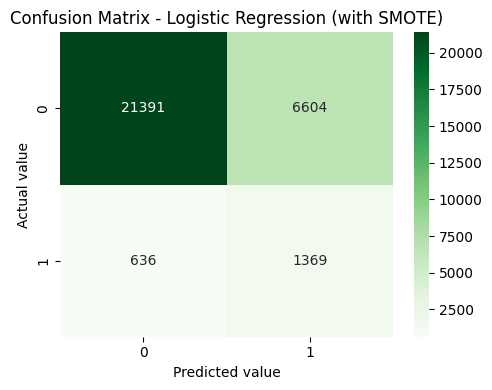

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_smote = log_reg_smote.predict(X_test_scaled_df)
cm_smote = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(5,4))
ax = sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix - Logistic Regression (with SMOTE)")
plt.tight_layout()


plt.savefig("confusion_matrix_logistic_smote.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


**Training the Support Vector Machine algorithm**



In [43]:
n_train_svm=20000 #using a subset due to the high computational cost of RBF SVM
n_test_svm=5000
X_train_svm=X_train_scaled_df.sample(n_train_svm,random_state=42)
y_train_svm= y_train.loc[X_train_svm.index]
X_test_svm=X_test_scaled_df.sample(n_test_svm, random_state=42)
y_test_svm=y_test.loc[X_test_svm.index]
X_train_svm.shape, X_test_svm.shape



((20000, 11), (5000, 11))

In [25]:
from sklearn.svm import SVC
svm_baseline=SVC(kernel="rbf",C=0.1, gamma="scale",random_state=42)
svm_baseline.fit(X_train_svm,y_train_svm)

SVC(C=0.1, random_state=42)

In [26]:
y_pred_svm=svm_baseline.predict(X_test_svm)
y_scores_svm=svm_baseline.decision_function(X_test_svm)

In [27]:
acc_svm  = accuracy_score(y_test_svm, y_pred_svm)
prec_svm = precision_score(y_test_svm, y_pred_svm)
rec_svm  = recall_score(y_test_svm, y_pred_svm)
f1_svm   = f1_score(y_test_svm, y_pred_svm)
roc_svm  = roc_auc_score(y_test_svm, y_scores_svm)

print(f"Accuracy (SVM baseline, subset):  {acc_svm:.4f}")
print(f"Precision (SVM baseline, subset): {prec_svm:.4f}")
print(f"Recall (SVM baseline, subset):    {rec_svm:.4f}")
print(f"F1-score (SVM baseline, subset):  {f1_svm:.4f}")
print(f"ROC-AUC (SVM baseline, subset):   {roc_svm:.4f}")


Accuracy (SVM baseline, subset):  0.9370
Precision (SVM baseline, subset): 0.0000
Recall (SVM baseline, subset):    0.0000
F1-score (SVM baseline, subset):  0.0000
ROC-AUC (SVM baseline, subset):   0.7147


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Training the SVM with class weight for class imbalance**





In [28]:
svm_balanced=SVC(kernel="rbf",C=0.1, gamma="scale",class_weight="balanced",random_state=42)
svm_balanced.fit(X_train_svm,y_train_svm)
y_pred_svm_bal=svm_balanced.predict(X_test_svm)
y_scores_svm_bal=svm_balanced.decision_function(X_test_svm)
acc_svm_bal  = accuracy_score(y_test_svm, y_pred_svm_bal)
prec_svm_bal = precision_score(y_test_svm, y_pred_svm_bal)
rec_svm_bal  = recall_score(y_test_svm, y_pred_svm_bal)
f1_svm_bal   = f1_score(y_test_svm, y_pred_svm_bal)
roc_svm_bal  = roc_auc_score(y_test_svm, y_scores_svm_bal)

print("=== SVM με class_weight='balanced' (subset) ===")
print(f"Accuracy:  {acc_svm_bal:.4f}")
print(f"Precision: {prec_svm_bal:.4f}")
print(f"Recall:    {rec_svm_bal:.4f}")
print(f"F1-score:  {f1_svm_bal:.4f}")
print(f"ROC-AUC:   {roc_svm_bal:.4f}")




=== SVM με class_weight='balanced' (subset) ===
Accuracy:  0.8256
Precision: 0.2078
Recall:    0.6286
F1-score:  0.3123
ROC-AUC:   0.8218


**Training the SVM with SMOTE**

In [29]:
X_train_svm_sm, y_train_svm_sm = smote.fit_resample(X_train_svm,y_train_svm)
X_train_svm_sm.shape, y_train_svm_sm.value_counts()


((37294, 11),
 SeriousDlqin2yrs
 0    18647
 1    18647
 Name: count, dtype: int64)

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_svm_sm, y_train_svm_sm = smote.fit_resample(X_train_svm, y_train_svm)

X_train_svm_sm.shape, y_train_svm_sm.value_counts()
svm_smote = SVC(
    kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_smote.fit(X_train_svm_sm, y_train_svm_sm)
y_pred_svm_sm = svm_smote.predict(X_test_svm)
y_scores_svm_sm = svm_smote.decision_function(X_test_svm)
acc_svm_sm  = accuracy_score(y_test_svm, y_pred_svm_sm)
prec_svm_sm = precision_score(y_test_svm, y_pred_svm_sm)
rec_svm_sm  = recall_score(y_test_svm, y_pred_svm_sm)
f1_svm_sm   = f1_score(y_test_svm, y_pred_svm_sm)
roc_svm_sm  = roc_auc_score(y_test_svm, y_scores_svm_sm)

print("=== SVM with SMOTE (subset) ===")
print(f"Accuracy:  {acc_svm_sm:.4f}")
print(f"Precision: {prec_svm_sm:.4f}")
print(f"Recall:    {rec_svm_sm:.4f}")
print(f"F1-score:  {f1_svm_sm:.4f}")
print(f"ROC-AUC:   {roc_svm_sm:.4f}")




=== SVM with SMOTE (subset) ===
Accuracy:  0.8404
Precision: 0.2326
Recall:    0.6667
F1-score:  0.3448
ROC-AUC:   0.8205


**Hyperparameter tuning**

In [31]:
from sklearn.model_selection import GridSearchCV
svm_for_gs=SVC(kernel="rbf", random_state=42)
param_grid={"C": [0.1, 1, 10], "gamma":["scale", 0.1, 0.01]} #grid of parameters



In [32]:
grid = GridSearchCV( estimator=svm_for_gs, param_grid=param_grid, scoring="roc_auc", cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train_svm_sm,y_train_svm_sm)
print("Best parameters found:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)



Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters found: {'C': 10, 'gamma': 0.1}
Best CV ROC-AUC: 0.8856593548932618


In [33]:
best_svm = grid.best_estimator_

y_pred_svm_tuned = best_svm.predict(X_test_svm)
y_scores_svm_tuned = best_svm.decision_function(X_test_svm)

acc_svm_tuned  = accuracy_score(y_test_svm, y_pred_svm_tuned)
prec_svm_tuned = precision_score(y_test_svm, y_pred_svm_tuned)
rec_svm_tuned  = recall_score(y_test_svm, y_pred_svm_tuned)
f1_svm_tuned   = f1_score(y_test_svm, y_pred_svm_tuned)
roc_svm_tuned  = roc_auc_score(y_test_svm, y_scores_svm_tuned)

print("=== SVM + SMOTE (tuned) on test subset ===")
print(f"Accuracy:  {acc_svm_tuned:.4f}")
print(f"Precision: {prec_svm_tuned:.4f}")
print(f"Recall:    {rec_svm_tuned:.4f}")
print(f"F1-score:  {f1_svm_tuned:.4f}")
print(f"ROC-AUC:   {roc_svm_tuned:.4f}")


=== SVM + SMOTE (tuned) on test subset ===
Accuracy:  0.8296
Precision: 0.2200
Recall:    0.6698
F1-score:  0.3312
ROC-AUC:   0.7853


**Visualization and Model Comparison**

In [37]:
results_svm={
    "Model":["SVM", "SVM with class weight", "SVM with SMOTE", "SVM with SMOTE and hyperparameter tuning"],
"Accuracy": [0.93, 0.76, 0.79, 0.80],
    "Precision": [0.00, 0.17, 0.19, 0.19],
    "Recall": [0.00, 0.72, 0.73, 0.70],
    "F1-score": [0.00, 0.28, 0.30, 0.31], "ROC-AUC":[0.72, 0.83, 0.83, 0.81]}

In [38]:
results_svm_df= pd.DataFrame(results_svm)
print(results_svm_df.to_string(index=False))

                                   Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
                                     SVM      0.93       0.00    0.00      0.00     0.72
                   SVM with class weight      0.76       0.17    0.72      0.28     0.83
                          SVM with SMOTE      0.79       0.19    0.73      0.30     0.83
SVM with SMOTE and hyperparameter tuning      0.80       0.19    0.70      0.31     0.81


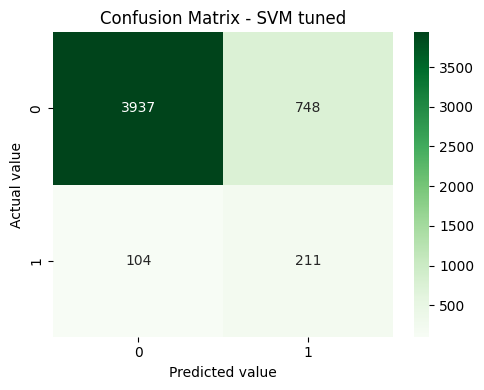

In [40]:
cm_svm_tuned= confusion_matrix(y_test_svm, y_pred_svm_tuned)
plt.figure(figsize=(5,4))
ax=sns.heatmap(cm_svm_tuned, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix - SVM tuned")
plt.tight_layout()
plt.savefig("Confusion_matrix_svm_tuned.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()
